In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pandas as pd
import sys
import os

myDir = os.getcwd()
sys.path.append(myDir)

from pathlib import Path
path = Path(myDir)
a=str(path.parent.absolute())

sys.path.append(a)

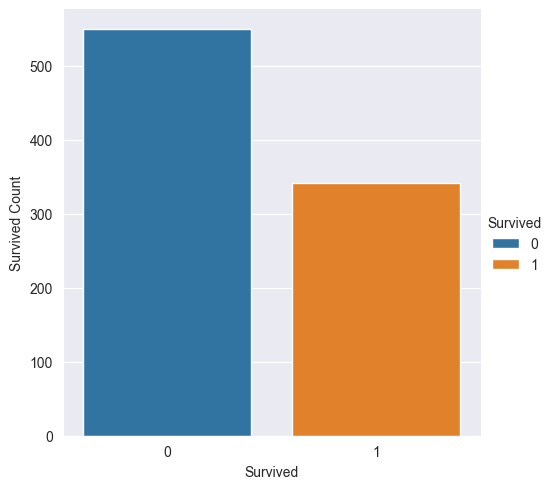

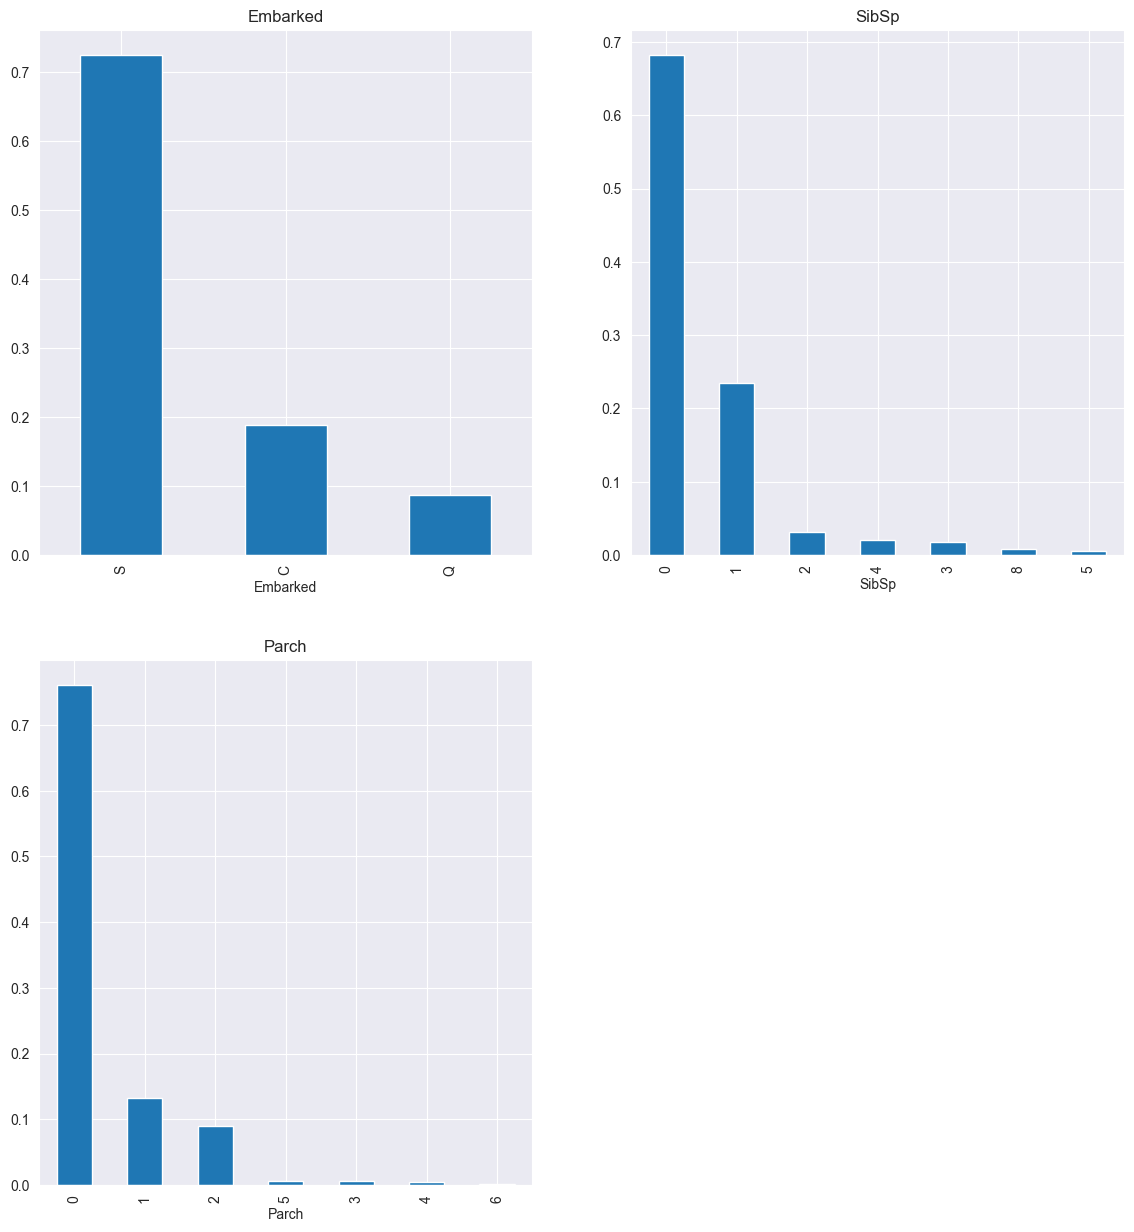

In [101]:
train_df = pd.read_csv(os.path.join(a, "titanic/data/train.csv"))
test_df = pd.read_csv(os.path.join(a ,"titanic/data/test.csv"))

# 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'



train_df_1 = train_df.copy()

train_df_1['Survived'].value_counts(normalize = True)

ax = sns.catplot(x = "Survived", data = train_df_1, kind = "count", hue="Survived")
ax.set_axis_labels("Survived", "Survived Count")




plt.figure(figsize = (14, 15)) 
plt.subplot(221)
train_df_1['Embarked'].value_counts(normalize = True).plot.bar(title = 'Embarked')
plt.subplot(222)
train_df_1['SibSp'].value_counts(normalize = True).plot.bar(title = 'SibSp')
plt.subplot(223)
train_df_1['Parch'].value_counts(normalize = True).plot.bar(title = 'Parch')
plt.show()


<Axes: title={'center': 'Sex'}, xlabel='Sex'>

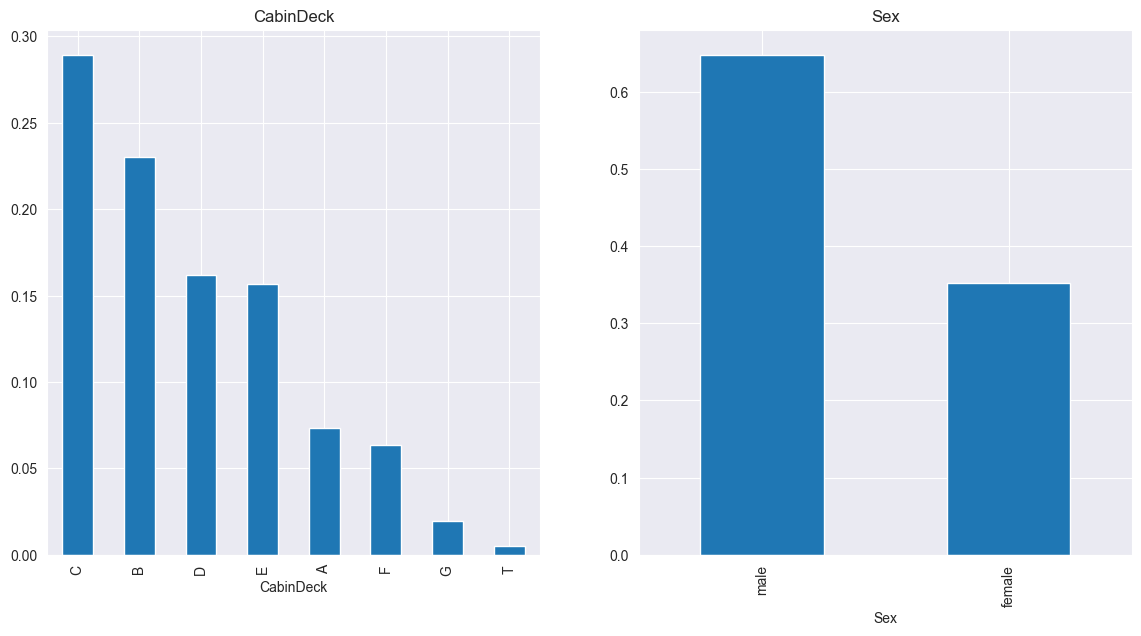

In [102]:
train_df_1["CabinDeck"] = train_df_1["Cabin"].apply(lambda x: str(x)[0] if pd.notna(x) else x)
train_df_1["CabinNo."] = train_df_1["Cabin"].apply(lambda x: str(x)[1:] if pd.notna(x) else x)

# Visualize cabin feature
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
train_df_1['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
train_df_1['Sex'].value_counts(normalize = True).plot.bar(title = 'Sex')

C:\Users\user\AppData\Local\Temp\ipykernel_10288\1487783638.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['Age'])
C:\Users\user\AppData\Local\Temp\ipykernel_10288\1487783638.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df_1['Fare'])


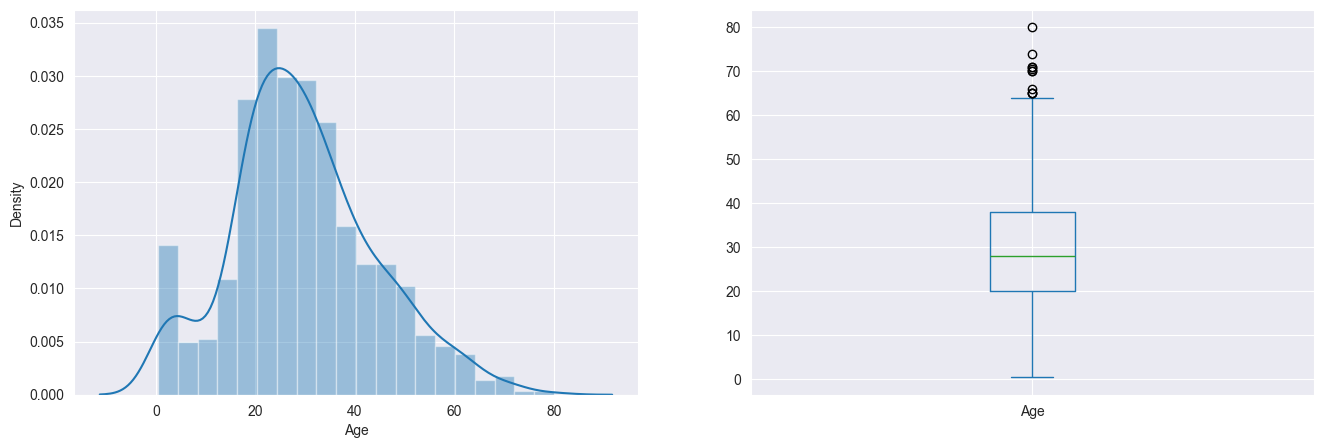

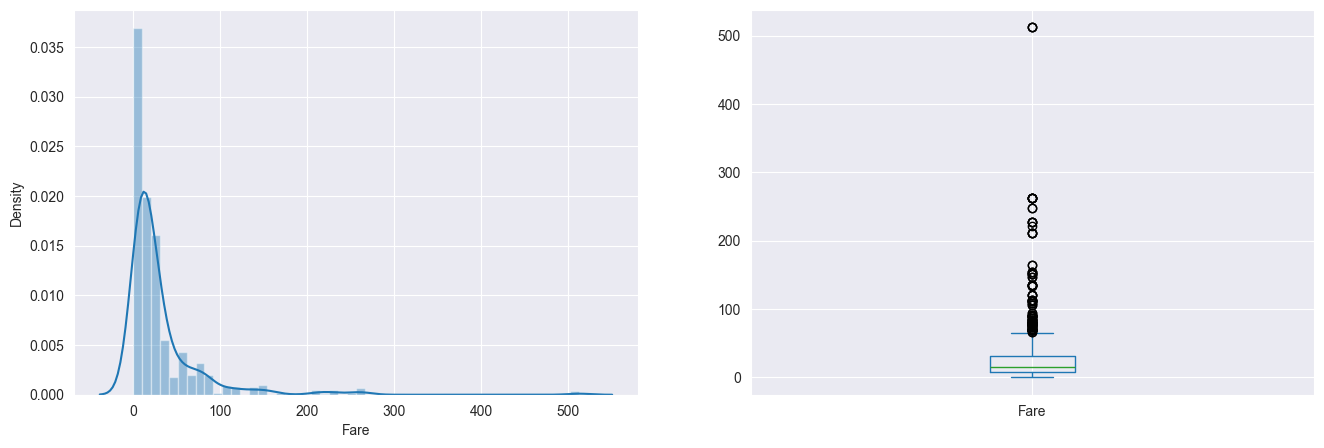

In [103]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Age'])
plt.subplot(122)
train_df_1['Age'].plot.box(figsize = (16, 5))

plt.figure(2)
plt.subplot(121)
sns.distplot(train_df_1['Fare'])
plt.subplot(122)
train_df_1['Fare'].plot.box(figsize = (16, 5))

plt.show()

In [104]:

# 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

Sex_Survived = train_df_1.groupby('Sex').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Sex_Survived['SurvivedPercentage'] = Sex_Survived['Survived'] / Sex_Survived['PassengerId']

Embarked_Survived = train_df_1.groupby('Embarked').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Embarked_Survived['SurvivedPercentage'] = Embarked_Survived['Survived'] / Embarked_Survived['PassengerId']

CabinDeck_Survived = train_df_1.groupby('CabinDeck').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Survived['SurvivedPercentage'] = CabinDeck_Survived['Survived'] / CabinDeck_Survived['PassengerId']

SibSp_Survived = train_df_1.groupby('SibSp').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

SibSp_Survived['SurvivedPercentage'] = SibSp_Survived['Survived'] / SibSp_Survived['PassengerId']

Parch_Survived = train_df_1.groupby('Parch').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Parch_Survived['SurvivedPercentage'] = Parch_Survived['Survived'] / Parch_Survived['PassengerId']


train_df_1["PassengerGroup"]  = train_df_1['SibSp'] + train_df_1['Parch']

PassengerGroup_Survived = train_df_1.groupby('PassengerGroup').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

PassengerGroup_Survived['SurvivedPercentage'] = PassengerGroup_Survived['Survived'] / PassengerGroup_Survived['PassengerId']

<Axes: xlabel='PassengerGroup', ylabel='SurvivedPercentage'>

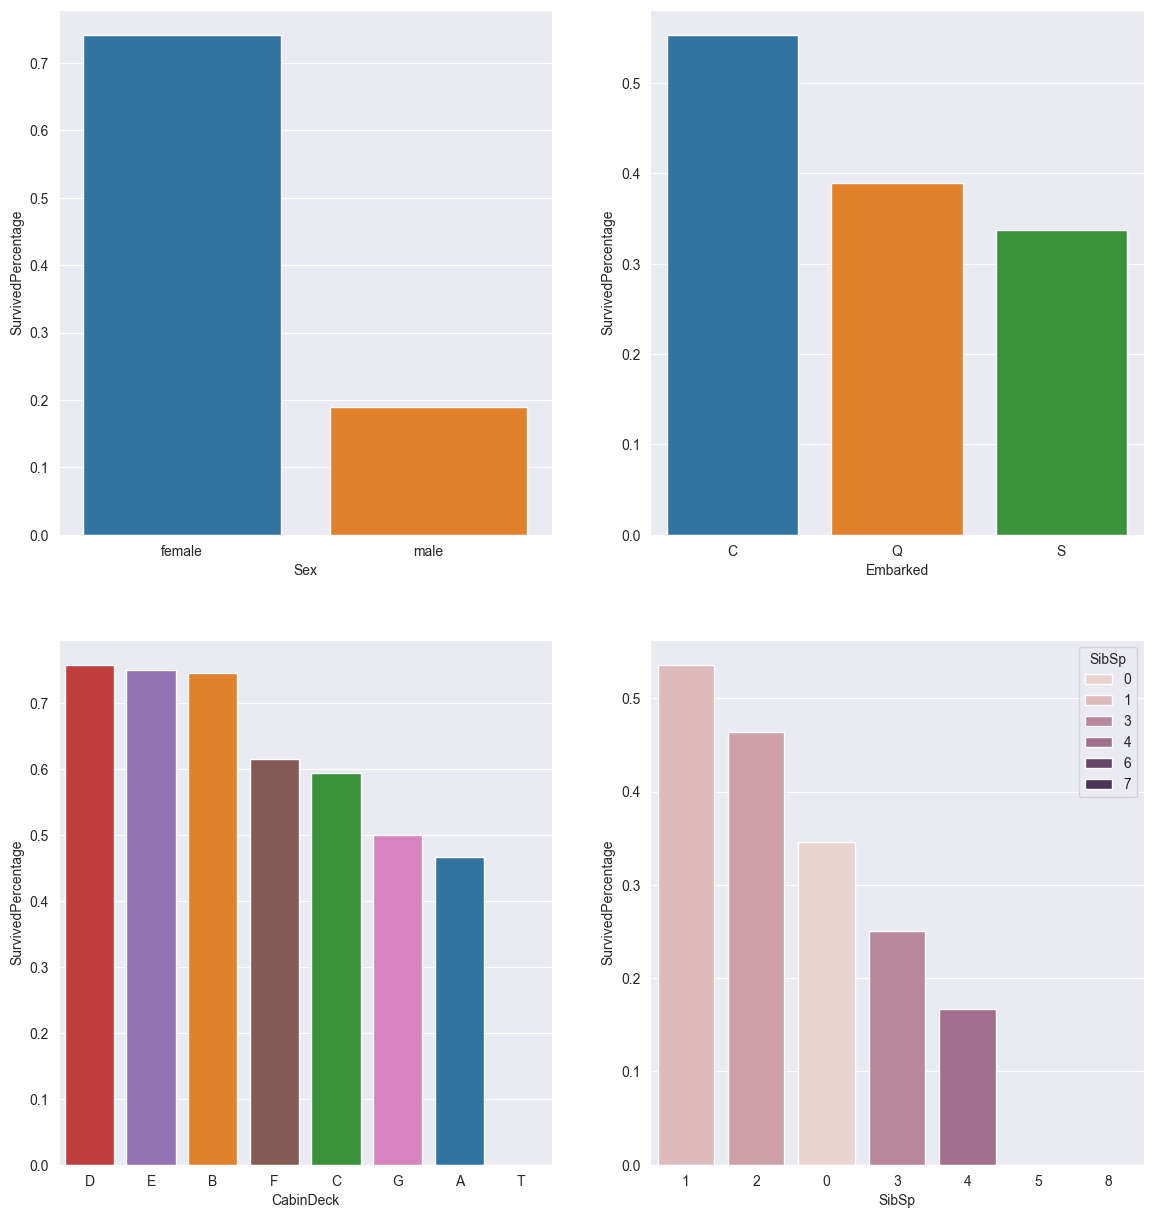

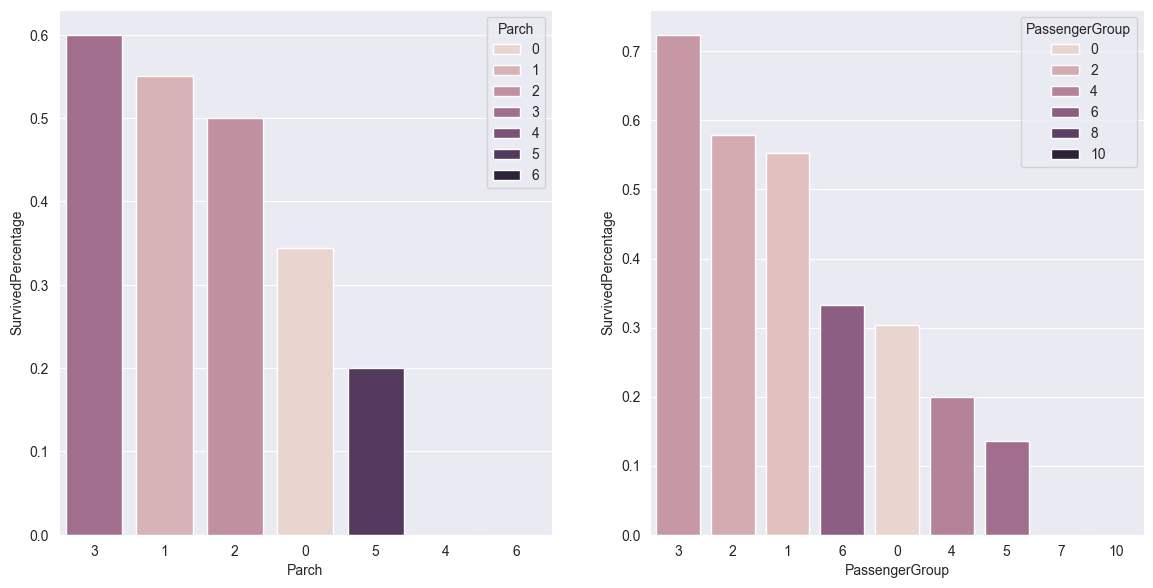

In [110]:

plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "Sex", hue="Sex", y = "SurvivedPercentage", data = Sex_Survived, order = Sex_Survived.sort_values('SurvivedPercentage', ascending = False).Sex)
plt.subplot(222)
sns.barplot(x = "Embarked", hue="Embarked", y = "SurvivedPercentage", data = Embarked_Survived, order = Embarked_Survived.sort_values('SurvivedPercentage', ascending = False).Embarked)
plt.subplot(223)
sns.barplot(x = "CabinDeck", hue="CabinDeck", y = "SurvivedPercentage", data = CabinDeck_Survived, order = CabinDeck_Survived.sort_values('SurvivedPercentage', ascending = False).CabinDeck)
plt.subplot(224)
sns.barplot(x = "SibSp", hue="SibSp", y = "SurvivedPercentage", data = SibSp_Survived, order = SibSp_Survived.sort_values('SurvivedPercentage', ascending = False).SibSp)
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
sns.barplot(x = "Parch", hue="Parch", y = "SurvivedPercentage", data = Parch_Survived, order = Parch_Survived.sort_values('SurvivedPercentage', ascending = False).Parch)
plt.subplot(222)
sns.barplot(x = "PassengerGroup", hue="PassengerGroup", y = "SurvivedPercentage", data = PassengerGroup_Survived, order = PassengerGroup_Survived.sort_values('SurvivedPercentage', ascending = False).PassengerGroup)

<Axes: xlabel='IsAlone', ylabel='SurvivedPercentage'>

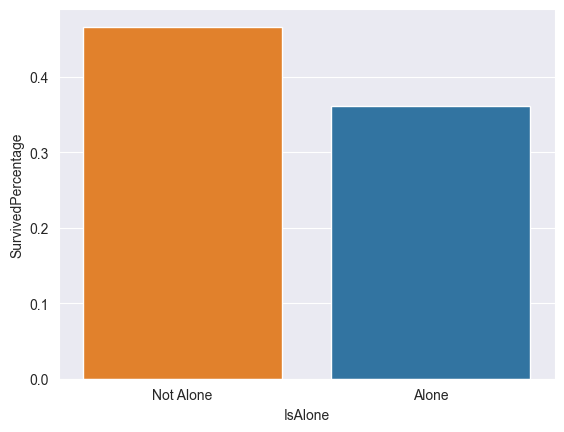

In [106]:
train_df_1["IsAlone"] = train_df_1["PassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")

IsAlone_Survived = train_df_1.groupby('IsAlone').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe IsAlone_Survived that contains percentage of passengers Survived Alone or Not Alone
IsAlone_Survived['SurvivedPercentage'] = IsAlone_Survived['Survived'] / IsAlone_Survived['PassengerId']

# Visualize IsAlone vs Survived
sns.barplot(x = "IsAlone", y = "SurvivedPercentage", hue="IsAlone", data = IsAlone_Survived, order = IsAlone_Survived.sort_values('SurvivedPercentage', ascending = False).IsAlone)

(-10.0, 280.0)

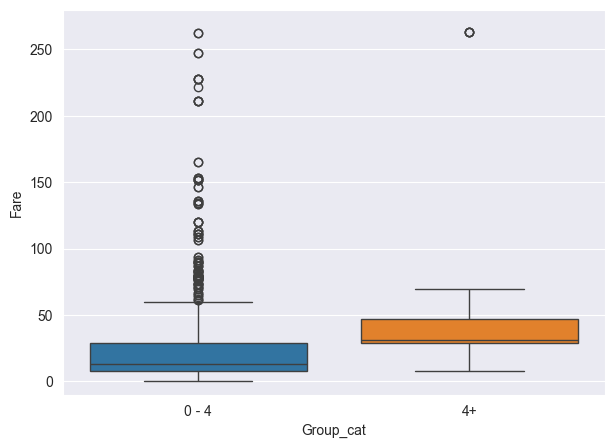

In [107]:
# FamilySizeCat vs TotalSpendings
train_df_1['Group_cat'] = pd.cut(train_df_1['PassengerGroup'], bins=[-1, 4, 11], labels=["0 - 4", "4+"])
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "Group_cat", y = "Fare", hue="Group_cat")
plt.ylim([-10, 280])

C:\Users\user\AppData\Local\Temp\ipykernel_10288\2867150269.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AgeCat_Survived = train_df_1.groupby('AgeCat').aggregate({'Survived': 'sum',


<Axes: xlabel='AgeCat', ylabel='SurvivedPercentage'>

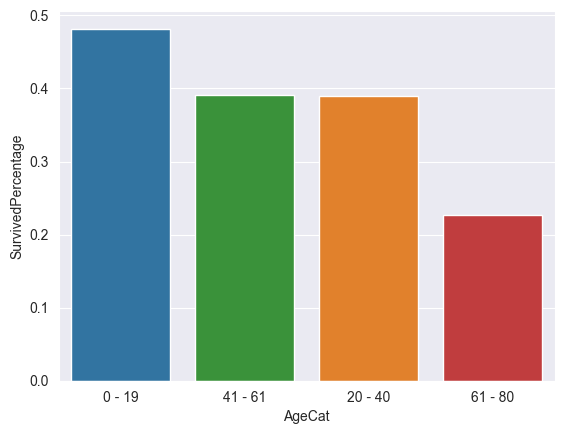

In [108]:
# Extract Age Category column from Age column
train_df_1["AgeCat"] = pd.cut(train_df_1.Age, bins = [0.0, 19.0, 40.0, 60.0, 80.0], labels = ['0 - 19', '20 - 40', '41 - 61', '61 - 80'])

AgeCat_Survived = train_df_1.groupby('AgeCat').aggregate({'Survived': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe AgeCat_Survived that has the Age Category and the percentage Survived
AgeCat_Survived['SurvivedPercentage'] = AgeCat_Survived['Survived'] / AgeCat_Survived['PassengerId']

# Visualize AgeCat vs Survived
sns.barplot(x = "AgeCat", y = "SurvivedPercentage", hue="AgeCat", data = AgeCat_Survived, order = AgeCat_Survived.sort_values('SurvivedPercentage', ascending=False).AgeCat)

(-50.0, 300.0)

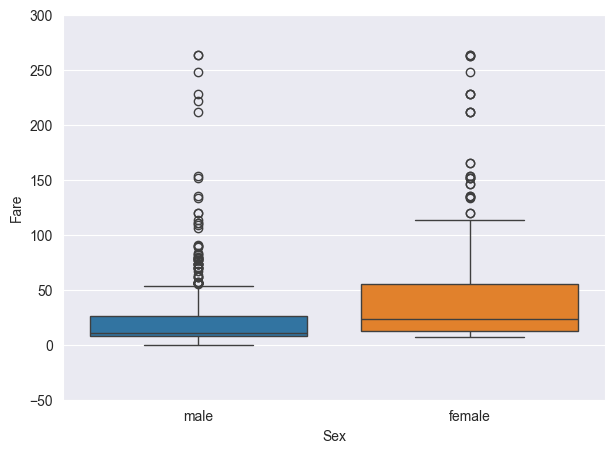

In [115]:
plt.figure(figsize = (7, 5))

sns.boxplot(hue = "Sex", data = train_df_1, x = "Sex", y = "Fare")
plt.ylim([-50, 300])

(-50.0, 300.0)

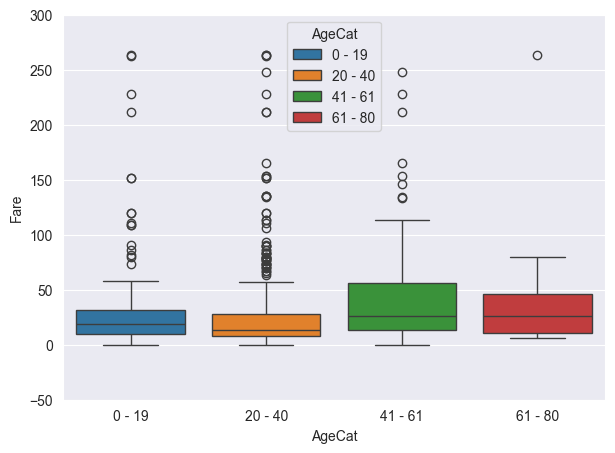

In [117]:
plt.figure(figsize = (7, 5))

sns.boxplot(hue = "AgeCat", data = train_df_1, x = "AgeCat", y = "Fare")
plt.ylim([-50, 300])

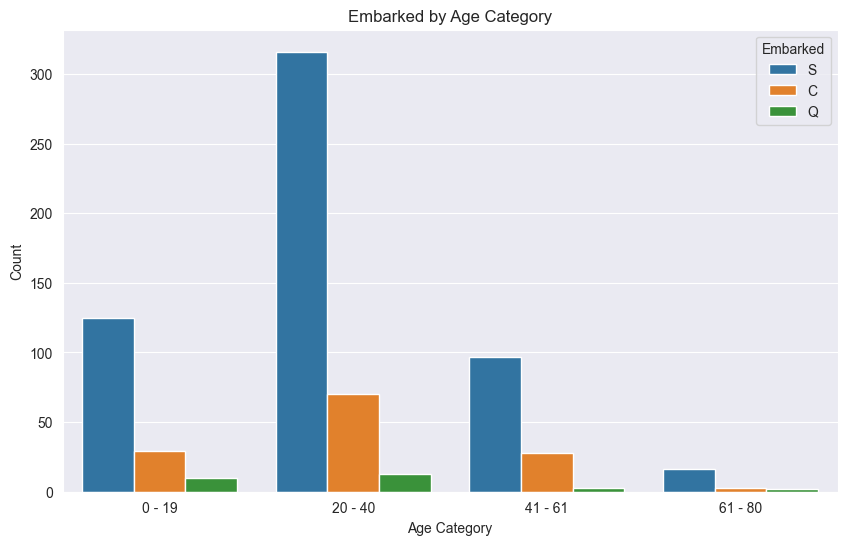

In [119]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCat', hue='Embarked', data=train_df_1, order=['0 - 19', '20 - 40', '41 - 61', '61 - 80'])
plt.title('Embarked by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Embarked')

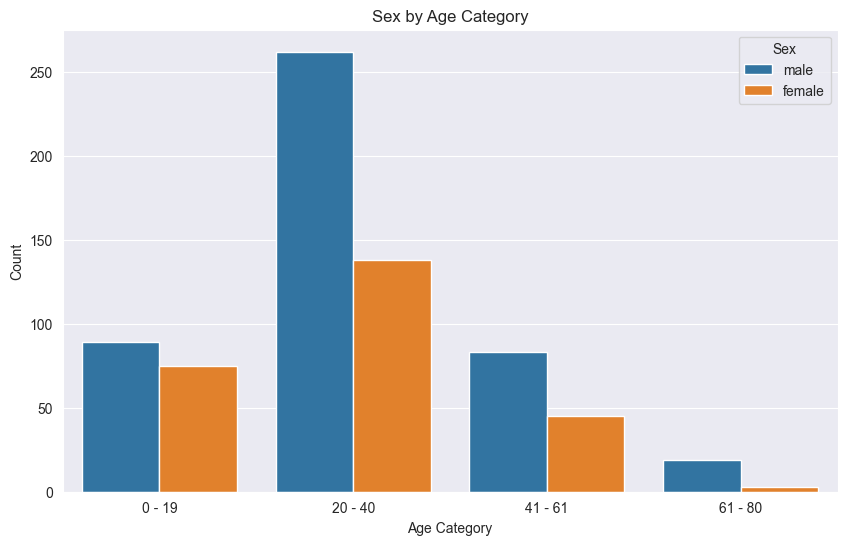

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCat', hue='Sex', data=train_df_1)
plt.title('Sex by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Sex')